# Understanding Descriptive Statistics

Import the necessary libraries here:

In [42]:
# Libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

def dice_throw(n):
    throws = random.choices([1,2,3,4,5,6], k = n)
    return pd.DataFrame(throws)

dice = dice_throw(10).sort_values(by = 0).reset_index()[0]

dice_rolls = pd.DataFrame(list(dice), columns = ["Rolls"])
dice_rolls

,Rolls
0,1
1,1
2,1
3,1
4,1
5,2
6,5
7,5
8,6
9,6


#### 2.- Plot the results sorted by value.

''

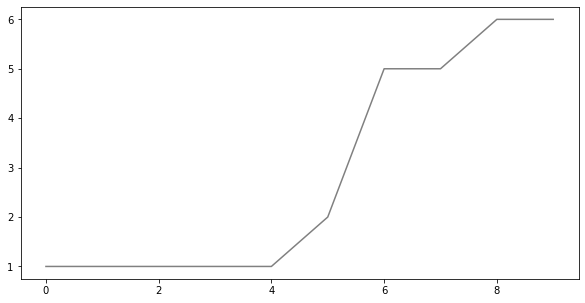

In [3]:
# your code here

plt.rcParams["figure.figsize"] = (10,5)

plt.plot(dice, color = 'gray')

""""""

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

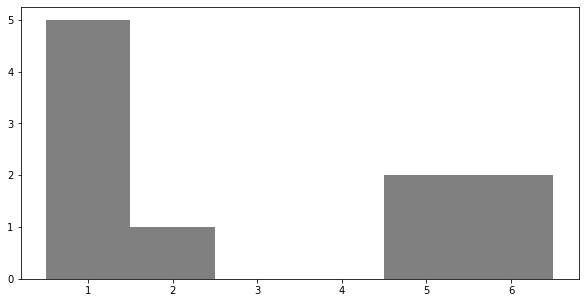

In [4]:
# your code here

plt.hist(dice, bins = 6, range = (0.5, 6.5), color = 'gray')

plt.show()

In [5]:
"""In the first graphic the X axis represents the number of dice rolls, and the Y axis represents the numeric values of the dice. Because as the number of dice rolls rise, the line also rises accordingly as the numeric values of the dice.
In the second graphic the X axis represents the numeric values of the dice and the Y axis represents their frequency. So that is why we have diferent sized bars for diferent values, because each bar represents the quantity of the numeric values that the dice rolled."""

'In the first graphic the X axis represents the number of dice rolls, and the Y axis represents the numeric values of the dice. Because as the number of dice rolls rise, the line also rises accordingly as the numeric values of the dice.\nIn the second graphic the X axis represents the numeric values of the dice and the Y axis represents their frequency. So that is why we have diferent sized bars for diferent values, because each bar represents the quantity of the numeric values that the dice rolled.'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

def mean(dice):
    mean = sum(dice) / len(dice)
    return mean

mean(dice)

2.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here

frequency_df = pd.Series(dice).value_counts().reset_index().sort_values("index")

frequency_df.columns = ["Number", "Frequency"]

print(mean(frequency_df["Frequency"]))

frequency_df

2.5


,Number,Frequency
0,1,5
3,2,1
2,5,2
1,6,2


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here
def median(dice):
    sortedLst = sorted(dice)
    lstLen = len(dice)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0

median(dice)

1.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here

def quartiles(dice):
    
    srtd = sorted(dice)
    
    half_list = int(len(srtd)/2)
    
    Q2 = median(dice)
    
    Q3 = median(srtd[half_list:])
    
    Q1 = median(srtd[:half_list])
    
    print("Q1: " + str(Q1))
    
    print("Q3: " + str(Q3))
    
    print("Q2: " + str(Q2))
    
    print("Interquartile Range: " + str(Q3 - Q1))
    
quartiles(dice)

Q1: 1
Q3: 5
Q2: 1.5
Interquartile Range: 4


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

''

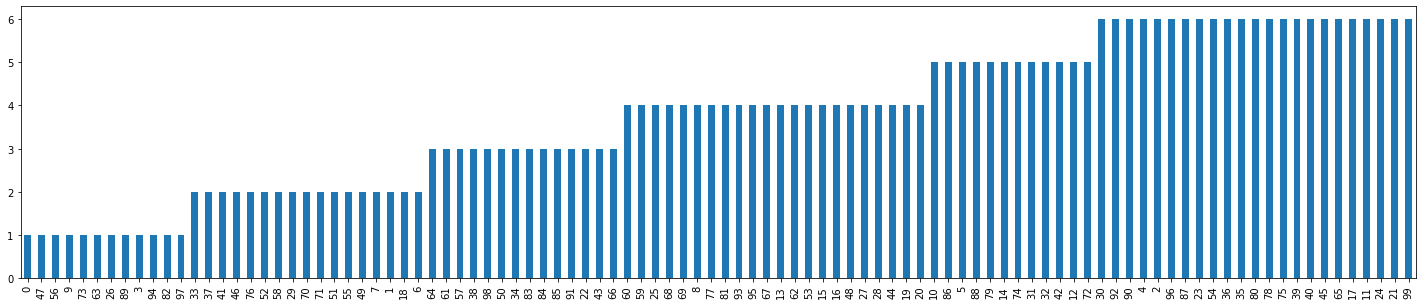

In [10]:
# your code here

df = pd.read_csv("../data/roll_the_dice_hundred.csv")

roll_the_dice_hundred = df.drop(columns = "Unnamed: 0").sort_values(by = ["value"])

plt.rcParams["figure.figsize"] = (25,5)

roll_the_dice_hundred["value"].plot.bar()

""""""

In [11]:
"""We can see the number of times rolled of all the values between 1 and 6.
We can also see that the number 6 was rolled the most.
We can also see that the number 1 and 5 were both rolled the least.
And in the X axis we can see the corresponding number of the casted roll (minus 1, because it's starts counting at 0)."""

"We can see the number of times rolled of all the values between 1 and 6.\nWe can also see that the number 6 was rolled the most.\nWe can also see that the number 1 and 5 were both rolled the least.\nAnd in the X axis we can see the corresponding number of the casted roll (minus 1, because it's starts counting at 0)."

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here

mean(roll_the_dice_hundred["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here

frequency_df = pd.Series(roll_the_dice_hundred["value"]).value_counts().reset_index().sort_values("index")

frequency_df.columns = ["Number", "Frequency"]

frequency_df

,Number,Frequency
5,1,12
2,2,17
3,3,14
1,4,22
4,5,12
0,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

''

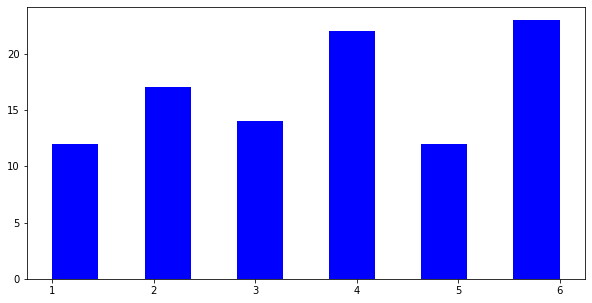

In [14]:
# your code here

plt.rcParams["figure.figsize"] = (10,5)

plt.hist(roll_the_dice_hundred["value"], bins = 11, range = (1, 6), color = "b")

""""""

In [15]:
"""Because the frequency of some values are higher than others, in this case, the mean will tend to be, in the middle of course, but slightly more closer to the values that happen the most.
In this case in particular, because the value 6 and 4 are the ones that occour most often, then mean will tend to be close to those values (mean = 3,74)"""

'Because the frequency of some values are higher than others, in this case, the mean will tend to be, in the middle of course, but slightly more closer to the values that happen the most.\nIn this case in particular, because the value 6 and 4 are the ones that occour most often, then mean will tend to be close to those values (mean = 3,74)'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

''

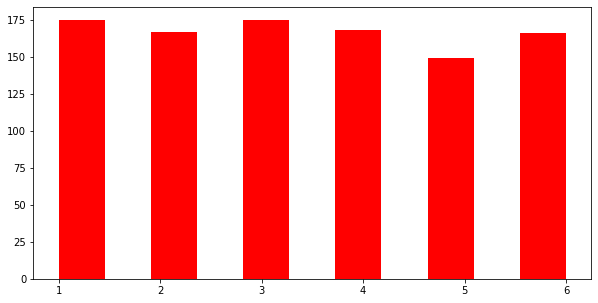

In [16]:
# your code here

df = pd.read_csv("../data/roll_the_dice_thousand.csv")

roll_the_dice_thousand = df.drop(columns = "Unnamed: 0").sort_values(by = ["value"])

plt.hist(roll_the_dice_thousand["value"], bins = 11, range = (1, 6), color = "r")

""""""

In [17]:
"""The more often a dice is rolled, the bigger is the chance that the sum of each independent value will tend to be evenly distributed with all the other values."""

'The more often a dice is rolled, the bigger is the chance that the sum of each independent value will tend to be evenly distributed with all the other values.'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

'The mean will be around 35 years. And the standart deviation for 68% will be in beteewn 25 and 45 years, wich means around 10 years of a standart deviation.'

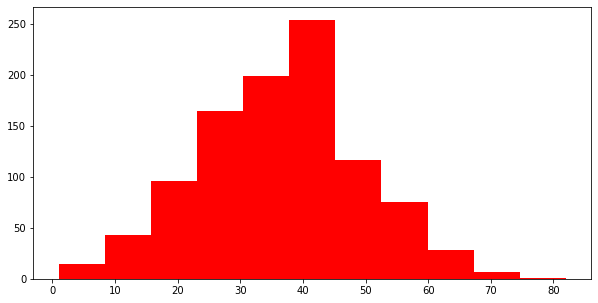

In [18]:
# your code here

df = pd.read_csv("../data/ages_population.csv")

ages_population = df.sort_values(by = ["observation"])

plt.hist(ages_population["observation"], bins = 11, color = "r")

"""The mean will be around 35 years. And the standart deviation for 68% will be in beteewn 25 and 45 years, wich means around 10 years of a standart deviation."""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [19]:
# your code here

print(ages_population.mean())

observation    36.56
dtype: float64


In [20]:
print(ages_population.std())

observation    12.8165
dtype: float64


In [21]:
"""The resulting values didn't fall out much further away from my original guesses"""

"The resulting values didn't fall out much further away from my original guesses"

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

''

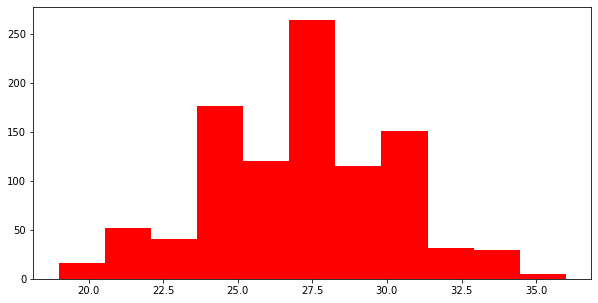

In [22]:
# your code here

df = pd.read_csv("../data/ages_population2.csv")

ages_population2 = df.sort_values(by = ["observation"])

plt.hist(ages_population2["observation"], bins = 11, color = "r")

""""""

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [23]:
"""In this case the range of the age of the population is only in between 20 and 35 years, a much lower range compared to the previouse graphic distribution.
The standard deviation will also be much lower compared to the previouse graphic.
Also the majoraty of the population has 27/28 years old, compared to the 40 years old of the previouse graphic distribution"""

'In this case the range of the age of the population is only in between 20 and 35 years, a much lower range compared to the previouse graphic distribution.\nThe standard deviation will also be much lower compared to the previouse graphic.\nAlso the majoraty of the population has 27/28 years old, compared to the 40 years old of the previouse graphic distribution'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [24]:
# your code here

print(ages_population2.mean())

observation    27.155
dtype: float64


In [25]:
print(ages_population2.std())

observation    2.969814
dtype: float64


In [26]:
"""The mean is around 27 years old, makes sense because we have an even distribution of ages, and with the age of 27 being the one with most records. Also the range of ages is only in between 20 and 35 years old, and the number 27.5 is the median.
The standard deviation is much lower, only 2,9 compared to the 12,8 in the previouse graphic distribution, because in this case the most records of ages are the ones closer to the median, as such: 25, 30, and 27,5 years old. This results in a smaller standard deviation number."""

'The mean is around 27 years old, makes sense because we have an even distribution of ages, and with the age of 27 being the one with most records. Also the range of ages is only in between 20 and 35 years old, and the number 27.5 is the median.\nThe standard deviation is much lower, only 2,9 compared to the 12,8 in the previouse graphic distribution, because in this case the most records of ages are the ones closer to the median, as such: 25, 30, and 27,5 years old. This results in a smaller standard deviation number.'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

''

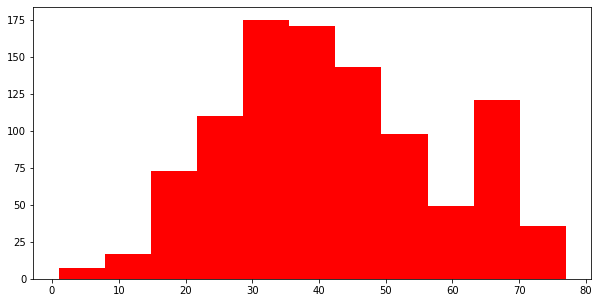

In [27]:
# your code here

df = pd.read_csv("../data/ages_population3.csv")

ages_population3 = df.sort_values(by = ["observation"])

plt.hist(ages_population3["observation"], bins = 11, color = "r")

""""""

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [28]:
# your code here

print(ages_population3.mean())

observation    41.989
dtype: float64


In [29]:
print(ages_population3.std())

observation    16.144706
dtype: float64


In [47]:
"""In this case the mean is around 42 years, because there are alot of records for people with an age of around 70 years, and that makes the mean to have a higher value than the median.
The standard deviation in this case is much higher, also because of the increse in records for older people making the graphic with a non symmetrical distribution."""

'In this case the mean is around 42 years, because there are alot of records for people with an age of around 70 years, and that makes the mean to have a higher value than the median.\nThe standard deviation in this case is much higher, also because of the increse in records for older people making the graphic with a non symmetrical distribution.'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [40]:
# your code here
ages_population3["observation"].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [34]:
"""As explained before the diference between the mean and the median is quite small, and the mean will tend to be higher than the median because we have alot of records for 70 years old, which will make the mean to tend to have a higher value."""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [46]:
# your code here

print(ages_population3.mode())

   observation
0         32.0


In [48]:
"""By looking at the mode value, and comparing it to the mean and the median, if we have a mode smaller than the median, and a median smaller than the mean, then our grahpic is positively skewed."""

'By looking at the mode value, and comparing it to the mean and the median, if we have a mode smaller than the median, and a median smaller than the mean, then our grahpic is positively skewed.'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [37]:
# your code here

In [38]:
"""
your comments here
"""

'\nyour comments here\n'